# Ridge Regression
**Ridge regression** performed on the dataset food_truck_profit.csv.  
The first column is the population of a city and the second column is the profit of a food truck in that city.  
A negative value for profit indicates a loss. Values are given in 10,000s of dollars.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import linear_model     # linear_model.Ridge
from sklearn import model_selection  # model_selection.train_test_split
from sklearn import metrics          # metrics.mean_squared_error, metrics.r2_score

%matplotlib inline

In [2]:
?linear_model.Ridge  # Useful trick!

### Helper function

In [3]:
def show_linear_regression_model_as_str(function_name, w1, w0=None):
    """
    function_name = f
    w0 = 4
    w0 = 1.5
    Function will return "f_w(x) = 4 + 1.5 * x"
    :param function_name: Name of the regression function (for example f)
    :param w1: Constant which will multiply x
    :param w0: Constant that will be added (intercept)
    :return:
    """
    if w0:
        return "%s_w(x) = %f + %f * x" % (function_name, w0, w1)
    else:
        return "%s_w(x) = %f * x" % (function_name, w1)

### Load our dataset

In [6]:
df = pd.read_csv('../datasets/food_truck_profit.csv')

In [7]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
x = df[['population']]  # pandas.core.frame.DataFrame, shape (97, 1)

In [15]:
y = df[['profit']]  # pandas.core.frame.DataFrame, shape (97, 1)

### Split the data

In [17]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, test_size=0.3)

### Construct a Ridge Regression model and perform the training process

In [18]:
r = linear_model.Ridge(alpha=0.1)  # Try changing alpha values

The L2 norm term in ridge regression is weighted by the regularization parameter alpha

So, if the alpha value is 0, it means that it is just an Ordinary Least Squares Regression model. 
So, the larger is the alpha, the higher is the smoothness constraint.

So, the smaller the value of alpha, the higher would be the magnitude of the coefficients.
<img src='./alpha.JPG'>

Resources used: [StackExcange Link](https://stats.stackexchange.com/questions/166950/alpha-parameter-in-ridge-regression-is-high).

In [20]:
r.fit(x_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
show_linear_regression_model_as_str("f", w1=r.coef_[0][0], w0=r.intercept_[0])

'f_w(x) = -4.259029 + 1.251725 * x'

### Evaluate model

In [22]:
y_train_pred = r.predict(x_train)
y_test_pred = r.predict(x_test)

In [23]:
metrics.mean_squared_error(y_true=y_train, y_pred=y_train_pred)  # Bigger, Why?

7.079707176387242

In [24]:
metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred)  # Smaller, Why?

13.348072778860717

In [25]:
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.7667643384783792

In [26]:
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.545514038700402

### Visualise our model

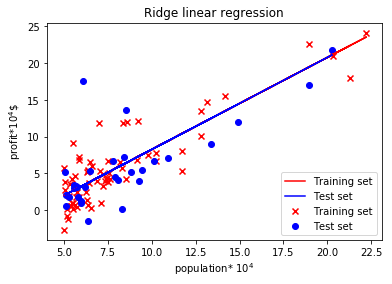

In [27]:
plt.scatter(x_train, y_train, color='red', marker='x', label='Training set')
plt.plot(x_train, y_train_pred, color='red', label='Training set')

plt.scatter(x_test, y_test, color='blue', label='Test set')
plt.plot(x_test, y_test_pred, color='blue', label='Test set')
   
plt.xlabel('population* $10^4$')
plt.ylabel('profit*$10^4\$$')
plt.legend(loc='lower right')
plt.title('Ridge linear regression')
plt.show()